# Cars4U Project: 
## Submitted by: Tomydas Pall

# Objective: 
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business. 

# Key tasks:

1. Load dataset 
2. Perform data preprocessing
3. Perform EDA using descriptive statistics and visualizations
4. Build a linear regression model and review model performance
5. Document key findings and make recommendations


# Dataset:
## File Name: used_cars_data.csv

1. S.No.: Serial number
2. Name: Name of the car which includes brand name and model name
3. Location: Location in which the car is being sold or is available for purchase (cities)
4. Year: Manufacturing year of the car
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission: The type of transmission used by the car (Automatic/Manual)
8. Owner: Type of ownership
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: The maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. Price: The price of the used car in INR Lakhs


# 1. Preparing and profiling the data

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [1755]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.4f' % x) # To suppress numerical display in scientific notations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [1756]:
import plotly.express as pk
#import plot

### Read in the dataset

In [1757]:
df = pd.read_csv("used_cars_data.csv")

### Make a copy of the dataset

In [1758]:
data = df.copy()

### Sample the dataset

In [1759]:
#Perform a random sampling by viewing 20 rows

np.random.seed(1)
data.sample(n=20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0000,9.47 Lakh,6.0000
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0000,5.44 Lakh,4.1100
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0000,NaN,6.0000
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0000,NaN,35.2800
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0000,NaN,6.3400
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0000,28.05 Lakh,24.8200
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0000,NaN,32.0000
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0000,NaN,20.7700
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0000,NaN,2.5000
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0000,9.36 Lakh,8.2000


Observations: 
- The dataset looks almost clean and consistent.
- 'S.No.' column behaves like an index and can be dropped.
- 'Mileage' column has values with suffix 'kmpl'
- 'Engine' column has values with suffic 'CC'
- 'Power' column has values with suffix 'bhp' 
- 'New_Price' column has some missing values

### Check the shape of the dataset

In [1760]:
df.shape

(7253, 14)

Observations: We have 7253 records of 14 columns

### Drop unwanted columns

S. No. column is merely an index. It can be dropped

In [1761]:
data.drop('S.No.',axis=1,inplace=True)

### Check the datatype of the variables to make sure that the data is read in properly

In [1762]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Down to 13 columns

In [1763]:
data.dtypes.value_counts()

object     9
int64      2
float64    2
dtype: int64

### Check for missing values

In [1764]:
data.isna().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

### Observations:

Dataset has several columns with missing values


### Summary of the dataset

In [1765]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.0000,7253.0000,7253,7253,7253,7251,7207,7078,7200.0000,1006,6019.0000
unique,2041,11,NaN,NaN,5,2,4,450,150,385,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.3654,58699.0631,NaN,NaN,NaN,NaN,NaN,NaN,5.2797,NaN,9.4795
std,NaN,NaN,3.2544,84427.7206,NaN,NaN,NaN,NaN,NaN,NaN,0.8117,NaN,11.1879
min,NaN,NaN,1996.0000,171.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,0.4400
25%,NaN,NaN,2011.0000,34000.0000,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,NaN,3.5000
50%,NaN,NaN,2014.0000,53416.0000,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,NaN,5.6400
75%,NaN,NaN,2016.0000,73000.0000,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,NaN,9.9500


### Let us analyse the quantitative variables in the dataset

In [1766]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.0000,7253.0000,7200.0000,6019.0000
mean,2013.3654,58699.0631,5.2797,9.4795
std,3.2544,84427.7206,0.8117,11.1879
min,1996.0000,171.0000,0.0000,0.4400
25%,2011.0000,34000.0000,5.0000,3.5000
50%,2014.0000,53416.0000,5.0000,5.6400
75%,2016.0000,73000.0000,5.0000,9.9500
max,2019.0000,6500000.0000,10.0000,160.0000


# 2. Data Preprocessing

### Drop records with missing values in the target variable

In [1767]:
#Target variable is 'Price'

data.dropna(subset=['Price'],inplace=True)

In [1768]:
#check for missing values in rest of the dataset

data.isnull().sum().sort_values(ascending=False)

New_Price            5195
Power                 143
Seats                  42
Engine                 36
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Price                   0
dtype: int64

In [1769]:
data.shape

(6019, 13)

### Let us first extract 'Make' and 'Model' from Name

In [1770]:
#Let's define a function to extract Make and Model from the Name

def make_of_car(var):
    spl = var.split(" ")
    make = spl[0]
    return make


def model_of_car(var):
    spl = var.split(" ",1)
    model = spl[1]
    return model
 

In [1771]:
data['Make'] = data['Name'].apply(make_of_car)

In [1772]:
data['Model'] = data['Name'].apply(model_of_car)

In [1773]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400,Audi,A4 New 2.0 TDI Multitronic


In [1774]:
data['Make'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Ambassador          1
Smart               1
Name: Make, dtype: int64

In [1775]:
Make_Outlier_Cars = data['Make'].value_counts() < 10

In [1776]:
Make_Outlier_Cars

Maruti           False
Hyundai          False
Honda            False
Toyota           False
Mercedes-Benz    False
Volkswagen       False
Ford             False
Mahindra         False
BMW              False
Audi             False
Tata             False
Skoda            False
Renault          False
Chevrolet        False
Nissan           False
Land             False
Jaguar           False
Fiat             False
Mitsubishi       False
Mini             False
Volvo            False
Porsche          False
Jeep             False
Datsun           False
Force             True
ISUZU             True
Bentley           True
Isuzu             True
Lamborghini       True
Ambassador        True
Smart             True
Name: Make, dtype: bool

In [1777]:
data['Model'].value_counts()

XUV500 W8 2WD               49
Swift VDI                   45
City 1.5 S MT               34
Swift Dzire VDI             34
Swift VDI BSIV              31
                            ..
Linea 1.3 Dynamic            1
Baleno Delta CVT             1
Octavia Elegance 1.9 TDI     1
Sonata 2.4 GDI               1
Quanto C4                    1
Name: Model, Length: 1876, dtype: int64

In [1778]:
# Common function to extract leading numeric value

# This function will extract the leading numeric value from a column
# If the column value is Null, then it will pass a zero

import regex as re

def extract_leading_numeric(var):
    #print(var)
    if var is None:
        return np.nan
    else:
        match = re.search(r'^?[0-9]*\.?[0-9]*',str(var))
        #print(match.group(0))
        return match.group(0)
    

## Let's analyze the Price

In [1779]:
data['Price'].value_counts().sort_index()

0.4400      1
0.4500      3
0.5000      2
0.5100      1
0.5300      2
           ..
93.6700     1
97.0700     1
100.0000    1
120.0000    1
160.0000    1
Name: Price, Length: 1373, dtype: int64

### Let's address the Missing and Zero values in Mileage

In [1780]:
data.loc[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0000,13.58 Lakh,13.0000,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0000,NaN,12.7500,Toyota,Prius 2009-2016 Z4


In [1781]:

data.loc[(data['Mileage'].isnull() == False),['Mileage']].value_counts()

Mileage   
18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
17.84 kmpl      1
11.56 kmpl      1
18.18 kmpl      1
18.23 kmpl      1
12.19 kmpl      1
Length: 442, dtype: int64

In [1782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  Make               6019 non-null   object 
 14  Model              6019 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 752.4+ KB


In [1783]:
data['Mileage_Value'] = data['Mileage'].apply(extract_leading_numeric)

In [1784]:
data['Mileage_Value'] = data['Mileage_Value'].apply(pd.to_numeric)

In [1785]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500,Maruti,Wagon R LXI CNG,26.6000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000,Hyundai,Creta 1.6 CRDi SX Option,19.6700
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000,Honda,Jazz V,18.2000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000,Maruti,Ertiga VDI,20.7700
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400,Audi,A4 New 2.0 TDI Multitronic,15.2000


### Extract leading numeric for Engine

In [1786]:
data['Engine_Value'] = data['Engine'].apply(extract_leading_numeric)

In [1787]:
data['Engine_Value'] = data['Engine_Value'].apply(pd.to_numeric)

In [1788]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value,Engine_Value
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500,Maruti,Wagon R LXI CNG,26.6000,998.0000
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000,Hyundai,Creta 1.6 CRDi SX Option,19.6700,1582.0000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000,Honda,Jazz V,18.2000,1199.0000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000,Maruti,Ertiga VDI,20.7700,1248.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400,Audi,A4 New 2.0 TDI Multitronic,15.2000,1968.0000


### Extract leading numeric to Power

In [1789]:
data['Power_Value'] = data['Power'].apply(extract_leading_numeric)

In [1790]:
data['Power_Value'] = data['Power_Value'].apply(pd.to_numeric)

In [1791]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value,Engine_Value,Power_Value
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500,Maruti,Wagon R LXI CNG,26.6000,998.0000,58.1600
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000,Hyundai,Creta 1.6 CRDi SX Option,19.6700,1582.0000,126.2000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000,Honda,Jazz V,18.2000,1199.0000,88.7000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000,Maruti,Ertiga VDI,20.7700,1248.0000,88.7600
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400,Audi,A4 New 2.0 TDI Multitronic,15.2000,1968.0000,140.8000


In [1792]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Make                    0
Model                   0
Mileage_Value           2
Engine_Value           36
Power_Value           143
dtype: int64

### Check for zero values

In [1793]:
data['Mileage_Value'].value_counts().sort_index()

0.0000     68
6.4000      1
7.5000      1
7.8100      1
7.9400      2
           ..
30.4600     1
31.7900     2
32.2600     2
33.4400     4
33.5400     5
Name: Mileage_Value, Length: 430, dtype: int64

Mileage_Value has 68 records with zero values

We will treat the zero values similar to missing values

#### Replace zeroes with Nan for Mileage_Value

In [1794]:
# Function to replace a 0 with a Nan

def replace_zero_to_na(var):
    #print(var)
    if var == 0:
        return np.nan
    else:
        return var
    

In [1795]:
data['Mileage_Value'] = data['Mileage_Value'].apply(lambda x: replace_zero_to_na(x))

In [1796]:
data['Mileage_Value'].value_counts().sort_index()

6.4000     1
7.5000     1
7.8100     1
7.9400     2
8.0000     1
          ..
30.4600    1
31.7900    2
32.2600    2
33.4400    4
33.5400    5
Name: Mileage_Value, Length: 429, dtype: int64

In [1797]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Make                    0
Model                   0
Mileage_Value          70
Engine_Value           36
Power_Value           143
dtype: int64

#### Replace all missing values of Mileage_Value with the median value grouped by Make

In [1798]:
data[['Make','Mileage_Value']].groupby('Make').median()

,Mileage_Value
Make,
Ambassador,12.8000
Audi,15.7300
BMW,17.0500
Bentley,8.6000
Chevrolet,18.2000
Datsun,22.7000
Fiat,19.0000
Force,17.0000
Ford,18.8800


In [1799]:
data['Mileage_Value'] = data.groupby('Make')['Mileage_Value'].transform(lambda x:x.fillna(x.median()))

In [1800]:
data[data['Mileage_Value'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value,Engine_Value,Power_Value
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,NaN,2.0000,NaN,3.0000,Smart,Fortwo CDI AT,NaN,799.0000,NaN


We see there is still one record with Null value for Mileage_Value 

This is due to single record for Make = 'Smart Fortwo CDI AT'

We will replace this Null value with the median of Mileage_Value

In [1801]:
data['Mileage_Value'] = data['Mileage_Value'].transform(lambda x:x.fillna(x.median()))

In [1802]:
data['Mileage_Value'].isnull().sum()

0

### Let's address Missing and Zero values for Engine_Value

In [1803]:
data['Engine_Value'].value_counts().sort_index()

72.0000        1
624.0000      25
793.0000       4
796.0000     129
799.0000      36
814.0000      59
936.0000      21
970.0000       1
993.0000      14
995.0000      10
998.0000     259
999.0000      29
1047.0000      4
1061.0000     30
1086.0000    108
1120.0000     54
1150.0000      7
1172.0000      3
1186.0000     14
1193.0000     23
1194.0000      3
1196.0000     50
1197.0000    606
1198.0000    227
1199.0000    143
1242.0000      2
1248.0000    512
1298.0000     39
1299.0000     10
1341.0000      9
1343.0000      4
1364.0000     47
1368.0000     10
1373.0000     47
1388.0000      9
1390.0000      4
1395.0000      3
1396.0000    139
1399.0000     88
1405.0000     19
1422.0000      1
1461.0000    152
1462.0000      6
1468.0000      1
1489.0000      1
1493.0000     47
1495.0000     15
1496.0000     25
1497.0000    229
1498.0000    304
1499.0000     21
1582.0000    145
1586.0000     23
1590.0000      5
1591.0000     94
1595.0000      9
1596.0000      5
1597.0000      2
1598.0000    1

Engine_Value has no zero values

In [1804]:
data['Engine_Value'].isnull().sum()

36

There are 36 Null values for Engine_Value

In [1805]:
data[['Make','Engine_Value']].groupby('Make').median()

,Engine_Value
Make,
Ambassador,1489.0000
Audi,1968.0000
BMW,1995.0000
Bentley,5998.0000
Chevrolet,1199.0000
Datsun,799.0000
Fiat,1248.0000
Force,2200.0000
Ford,1498.0000


#### Replace all missing values of Engine_Value with the median value grouped by Make

In [1806]:
data['Engine_Value'] = data.groupby('Make')['Engine_Value'].transform(lambda x:x.fillna(x.median()))

In [1807]:
data['Engine_Value'].isnull().sum()

0

### Let's address the Missing and Zero values for Power_Value

In [1808]:
data['Power_Value'].value_counts().sort_index()

34.2000      7
35.0000     17
35.5000      1
37.0000     12
37.4800     12
            ..
500.0000     1
503.0000     1
550.0000     1
552.0000     1
560.0000     1
Name: Power_Value, Length: 369, dtype: int64

There are no zero values for Power_Value

In [1809]:
data['Power_Value'].isnull().sum()

143

There are 143 missing values for Power_Value

We will replace the missing values with the median values grouped by Make

In [1810]:
data[['Make','Power_Value']].groupby('Make').median()

,Power_Value
Make,
Ambassador,35.5000
Audi,174.3300
BMW,190.0000
Bentley,552.0000
Chevrolet,79.4000
Datsun,53.6400
Fiat,91.2000
Force,139.0100
Ford,89.8400


#### Replace all missing values of Power_Value with the median value grouped by Make

In [1811]:
data['Power_Value'] = data.groupby('Make')['Power_Value'].transform(lambda x:x.fillna(x.median()))

In [1812]:
data[data['Power_Value'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value,Engine_Value,Power_Value
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,NaN,2.0000,NaN,3.0000,Smart,Fortwo CDI AT,18.2000,799.0000,NaN


We see there is still one record with Null value for Power_Value

This is due to single record for Make = 'Smart Fortwo CDI AT'

We will replace this Null value with the median of Power_Value

In [1813]:
data['Power_Value'] = data['Power_Value'].transform(lambda x:x.fillna(x.median()))

In [1814]:
data['Power_Value'].isnull().sum()

0

In [1815]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Make                    0
Model                   0
Mileage_Value           0
Engine_Value            0
Power_Value             0
dtype: int64

In [1816]:
data['Seats'].value_counts()

5.0000     5014
7.0000      674
8.0000      134
4.0000       99
6.0000       31
2.0000       16
10.0000       5
9.0000        3
0.0000        1
Name: Seats, dtype: int64

In [1817]:
data[data['Seats']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make,Model,Mileage_Value,Engine_Value,Power_Value
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0000,NaN,18.0000,Audi,A4 3.2 FSI Tiptronic Quattro,10.5000,3197.0000,174.3300


Treat zero values as missing values

In [1818]:
data['Seats'] = data['Seats'].apply(lambda x: replace_zero_to_na(x))

In [1819]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  43
New_Price            5195
Price                   0
Make                    0
Model                   0
Mileage_Value           0
Engine_Value            0
Power_Value             0
dtype: int64

In [1820]:
data['Seats'].value_counts()

5.0000     5014
7.0000      674
8.0000      134
4.0000       99
6.0000       31
2.0000       16
10.0000       5
9.0000        3
Name: Seats, dtype: int64

Change 'Seats' to a categorical column

In [1821]:
data['Seats'] = data['Seats'].astype('object')

In [1822]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                 object
New_Price             object
Price                float64
Make                  object
Model                 object
Mileage_Value        float64
Engine_Value         float64
Power_Value          float64
dtype: object

In [1823]:
data['Seats'].dtype

dtype('O')

In [1824]:
data['Seats'].fillna('is_missing', inplace=True)

In [1825]:
data['Seats'].value_counts()

5.0           5014
7.0            674
8.0            134
4.0             99
is_missing      43
6.0             31
2.0             16
10.0             5
9.0              3
Name: Seats, dtype: int64

In [1826]:
df1 = data[data['Seats'].isnull()].groupby('Model').count()

### We can drop columns Mileage, Engine, and Power

In [1827]:
data.drop(['Mileage','Engine','Power'], axis=1, inplace=True)

### We can also drop New_Price column as it has a large number of missing values

Also the New_Price is seldom a factor for a used car

In [1828]:
data[data['New_Price'].isna()].groupby('Make')['Name'].count()

Make
Ambassador          1
Audi              212
BMW               210
Bentley             1
Chevrolet         121
Datsun              6
Fiat               27
Force               3
Ford              275
Honda             540
Hyundai          1011
ISUZU               2
Jaguar             36
Lamborghini         1
Land               50
Mahindra          246
Maruti           1017
Mercedes-Benz     276
Mini               10
Mitsubishi         21
Nissan             76
Porsche            17
Renault           118
Skoda             154
Smart               1
Tata              143
Toyota            329
Volkswagen        273
Volvo              18
Name: Name, dtype: int64

In [1829]:
data.drop(['New_Price'], axis=1, inplace=True)

### Model can also be dropped as it has several unique values

In [1830]:
len(data['Model'].value_counts())

1876

In [1831]:
data.drop(['Model'], axis=1, inplace=True)

### Similarly Name can also be dropped as it has several unique values

In [1832]:
data.drop(['Name'], axis=1, inplace=True)

In [1833]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              6019 non-null   object 
 7   Price              6019 non-null   float64
 8   Make               6019 non-null   object 
 9   Mileage_Value      6019 non-null   float64
 10  Engine_Value       6019 non-null   float64
 11  Power_Value        6019 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 611.3+ KB


In [1834]:
data.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Make                 0
Mileage_Value        0
Engine_Value         0
Power_Value          0
dtype: int64

### We have no missing values now

In [1835]:
data['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

### Let's analyze the category columns

In [1836]:
data['Make'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Ambassador          1
Smart               1
Name: Make, dtype: int64

In [1837]:
data['Year'].value_counts().sort_index()

1998      4
1999      2
2000      4
2001      8
2002     15
2003     17
2004     31
2005     57
2006     78
2007    125
2008    174
2009    198
2010    342
2011    466
2012    580
2013    649
2014    797
2015    744
2016    741
2017    587
2018    298
2019    102
Name: Year, dtype: int64

### We can create a new column 'Age' that will replace the Year

In [1838]:
data['Age'] = data['Year'].apply(lambda x: 2021-x)


In [1839]:
data.drop(['Year'],axis=1, inplace=True)


In [1840]:
data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

# 3. Outlier Analysis

### Z-score analaysis of 'Price'

In [1841]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


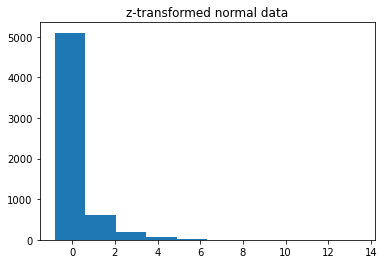

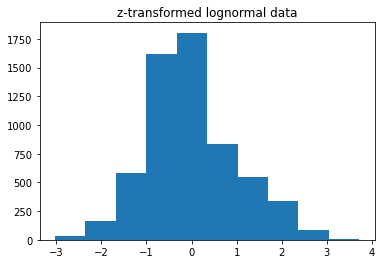

In [1842]:
x1 = data['Price']
x2 = np.log(data['Price'])


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()

- Vast majority of points lie between -3 and 3 on the Z-score
- No significant outliers in this dataset

### Z-score analysis of Kilometers_Driven

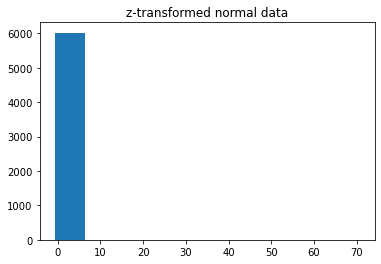

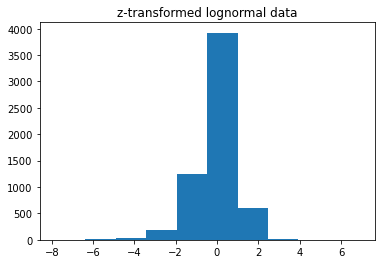

In [1843]:
x1 = data['Kilometers_Driven']
x2 = np.log(data['Kilometers_Driven'])


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()



- Most points lie between -3 and 3 on the Z-score
- No significant outliers in this dataset

### Z-score analysis of Age

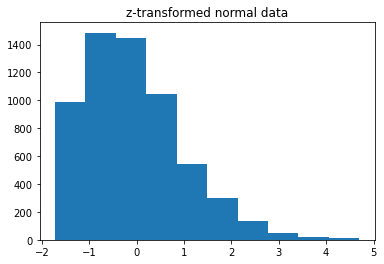

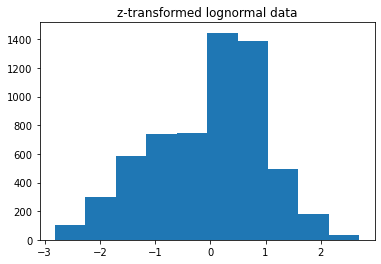

In [1844]:
x1 = data['Age']
x2 = np.log(data['Age'])


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()

- Most points lie between -3 and 3 on the Z-score
- No significant outliers in this dataset

### Z-score analysis of Power_Value

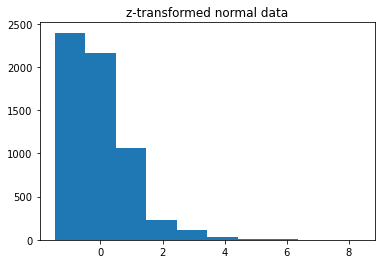

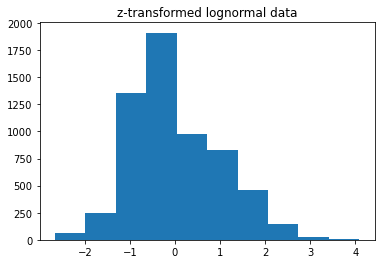

In [1845]:
x1 = data['Power_Value']
x2 = np.log(data['Power_Value'])


plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()


plt.hist(z_transform(x2))
plt.title('z-transformed lognormal data')
plt.show()

- Most points lie between -3 and 3 on the Z-score
- No significant outliers in this dataset

In [1846]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,6019.0000,58738.3803,91268.8432,171.0000,34000.0000,53000.0000,73000.0000,6500000.0000
Price,6019.0000,9.4795,11.1879,0.4400,3.5000,5.6400,9.9500,160.0000
Mileage_Value,6019.0000,18.3242,4.1634,6.4000,15.2900,18.2000,21.1000,33.5400
Engine_Value,6019.0000,1620.4311,600.4041,72.0000,1197.0000,1493.0000,1984.0000,5998.0000
Power_Value,6019.0000,112.9349,53.6310,34.2000,75.0000,93.7000,138.1000,560.0000
Age,6019.0000,7.6418,3.2697,2.0000,5.0000,7.0000,10.0000,23.0000


# 4. Univariate Analysis

In [1847]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(12, 6), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram
    
    


### Price (Target Variable)

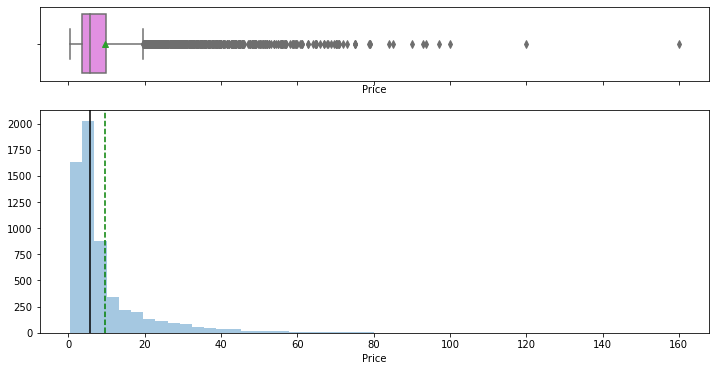

In [1848]:
histogram_boxplot(data["Price"])

The distribution is right skewed

### Kilometers_Driven

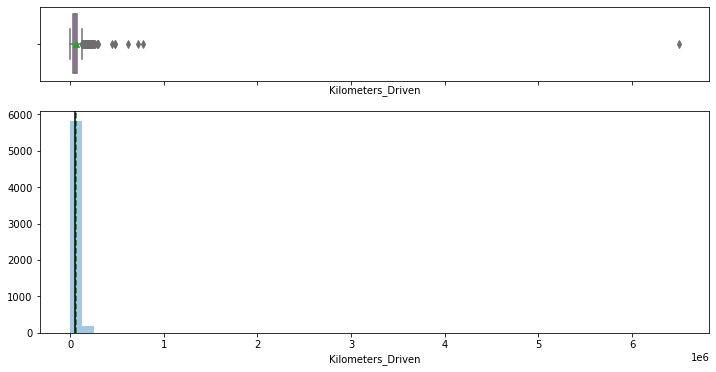

In [1849]:
histogram_boxplot(data["Kilometers_Driven"])

Distribution is slightly right skewed and a few outliers

### Mileage_Value

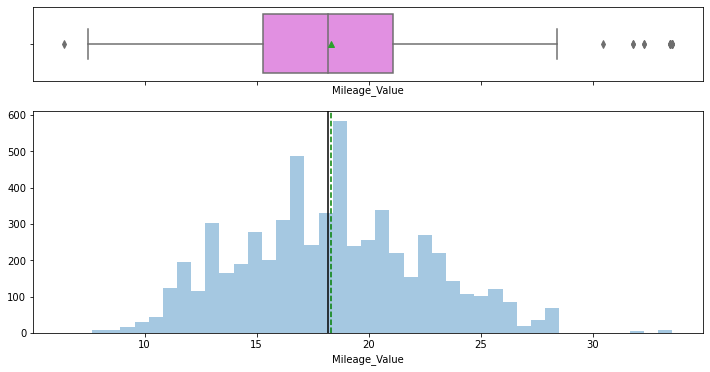

In [1850]:
histogram_boxplot(data["Mileage_Value"])

Distribution is evenly spread with some outliers

### Engine_Value

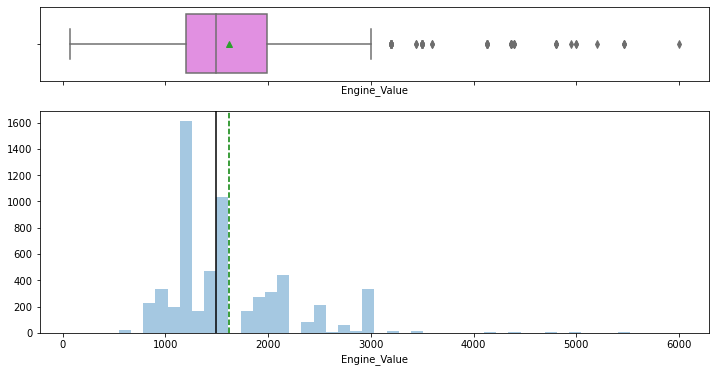

In [1851]:
histogram_boxplot(data["Engine_Value"])

Distribution is right skewed with some outliers

### Power Value

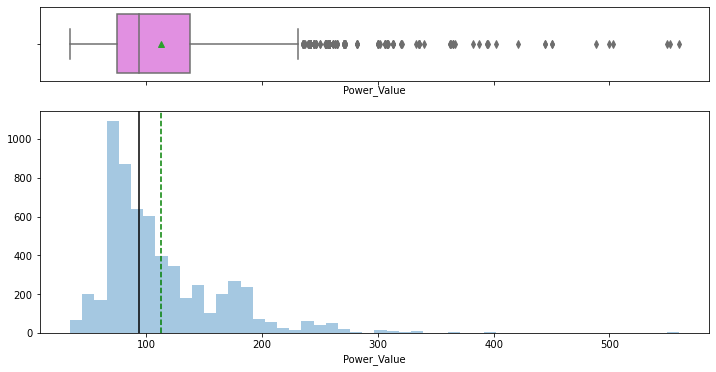

In [1852]:
histogram_boxplot(data["Power_Value"])

Distribution is right skewed with some outliers

### Age

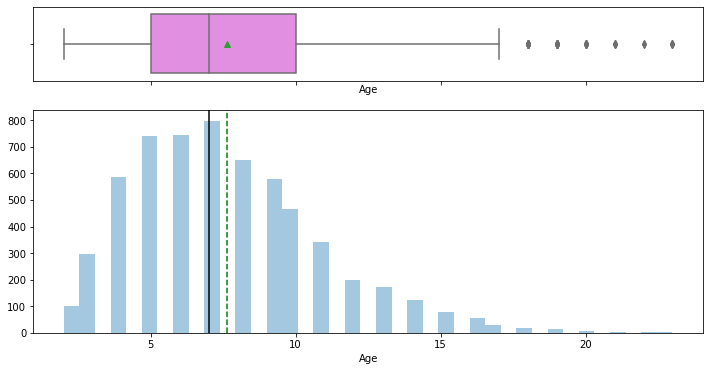

In [1853]:
histogram_boxplot(data["Age"])

In [1854]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

### Location

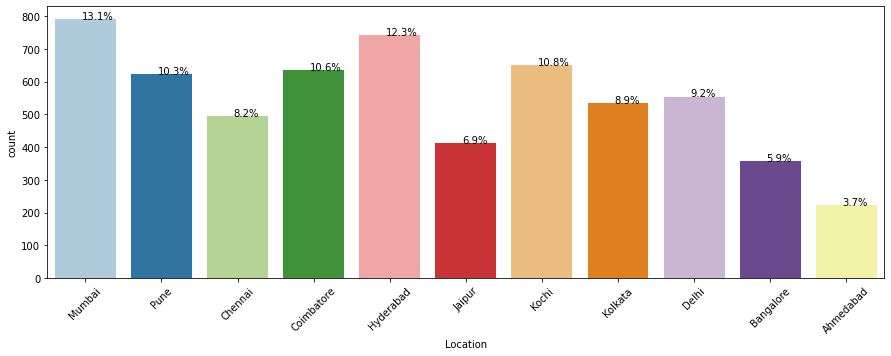

In [1855]:
perc_on_bar(data,'Location')

In [1856]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Seats              6019 non-null   object 
 6   Price              6019 non-null   float64
 7   Make               6019 non-null   object 
 8   Mileage_Value      6019 non-null   float64
 9   Engine_Value       6019 non-null   float64
 10  Power_Value        6019 non-null   float64
 11  Age                6019 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 740.3+ KB


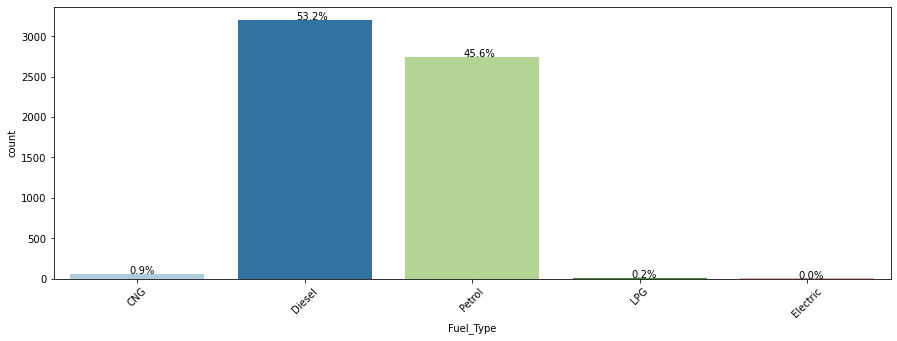

In [1857]:
perc_on_bar(data,'Fuel_Type')

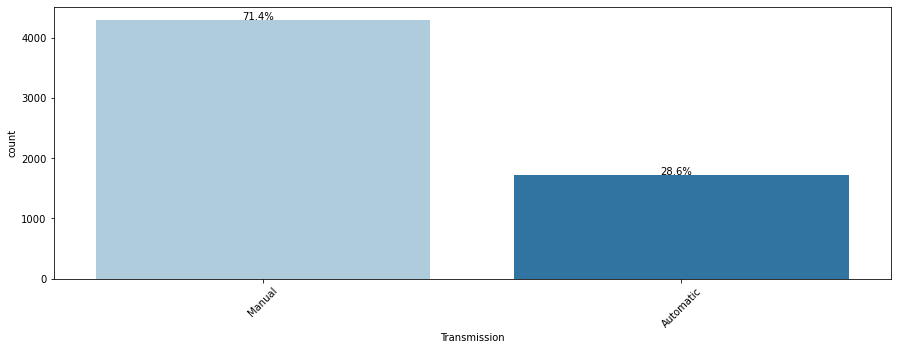

In [1858]:
perc_on_bar(data,'Transmission')

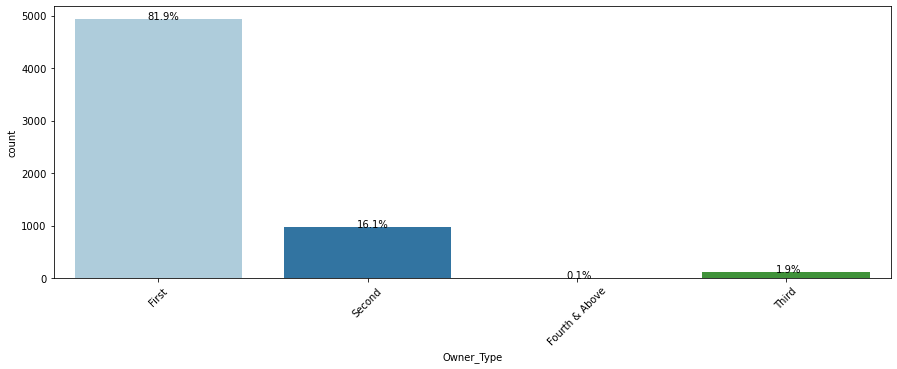

In [1859]:
perc_on_bar(data,'Owner_Type')

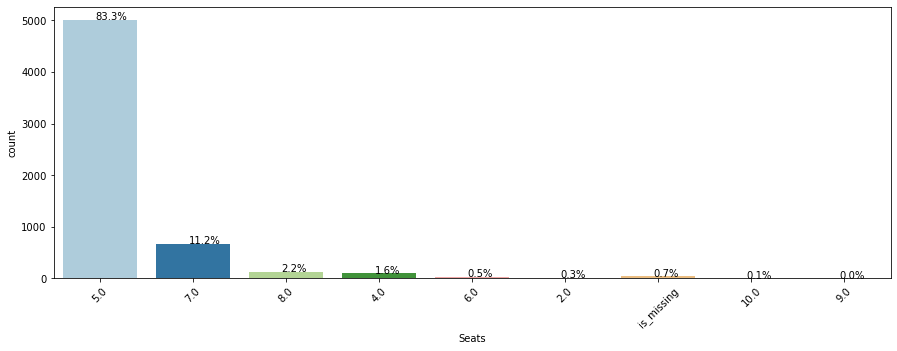

In [1860]:
perc_on_bar(data,'Seats')

Data is predomnantly 5.0 seats

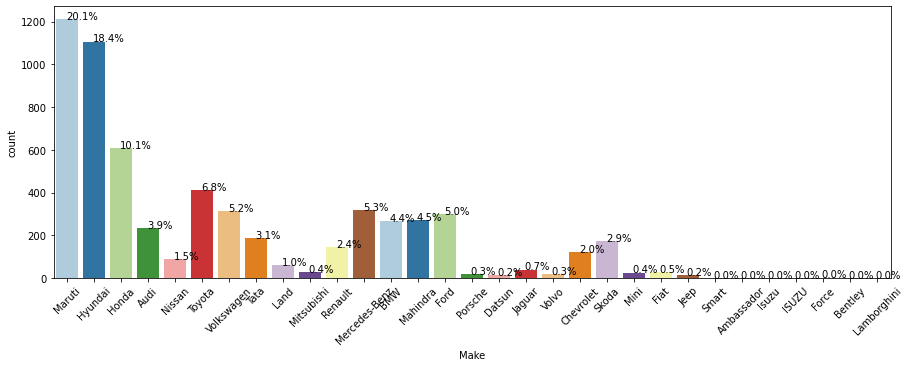

In [1861]:
perc_on_bar(data,'Make')

# 5. Bivariate Analysis

#### create a list of non-tag columns

In [1862]:
corr_cols = ['Price','Kilometers_Driven','Mileage_Value', 'Engine_Value', 'Power_Value','Age'  ]

### Heatmap

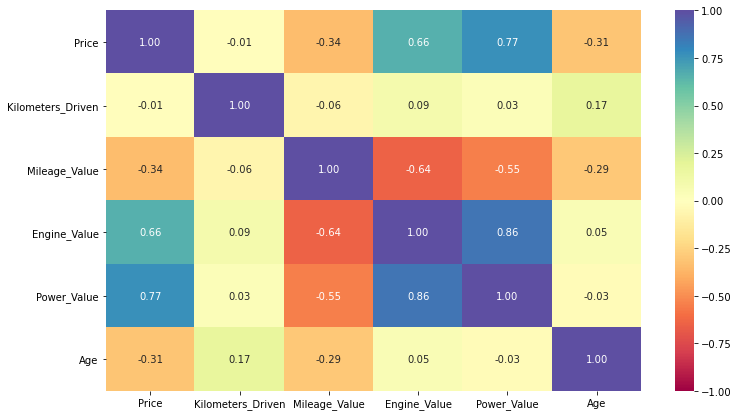

In [1863]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Price is positively correlated with Power_Value and Engine_Value
- Price is negatively correlated with Age and Mileage_Value

### Pairplot

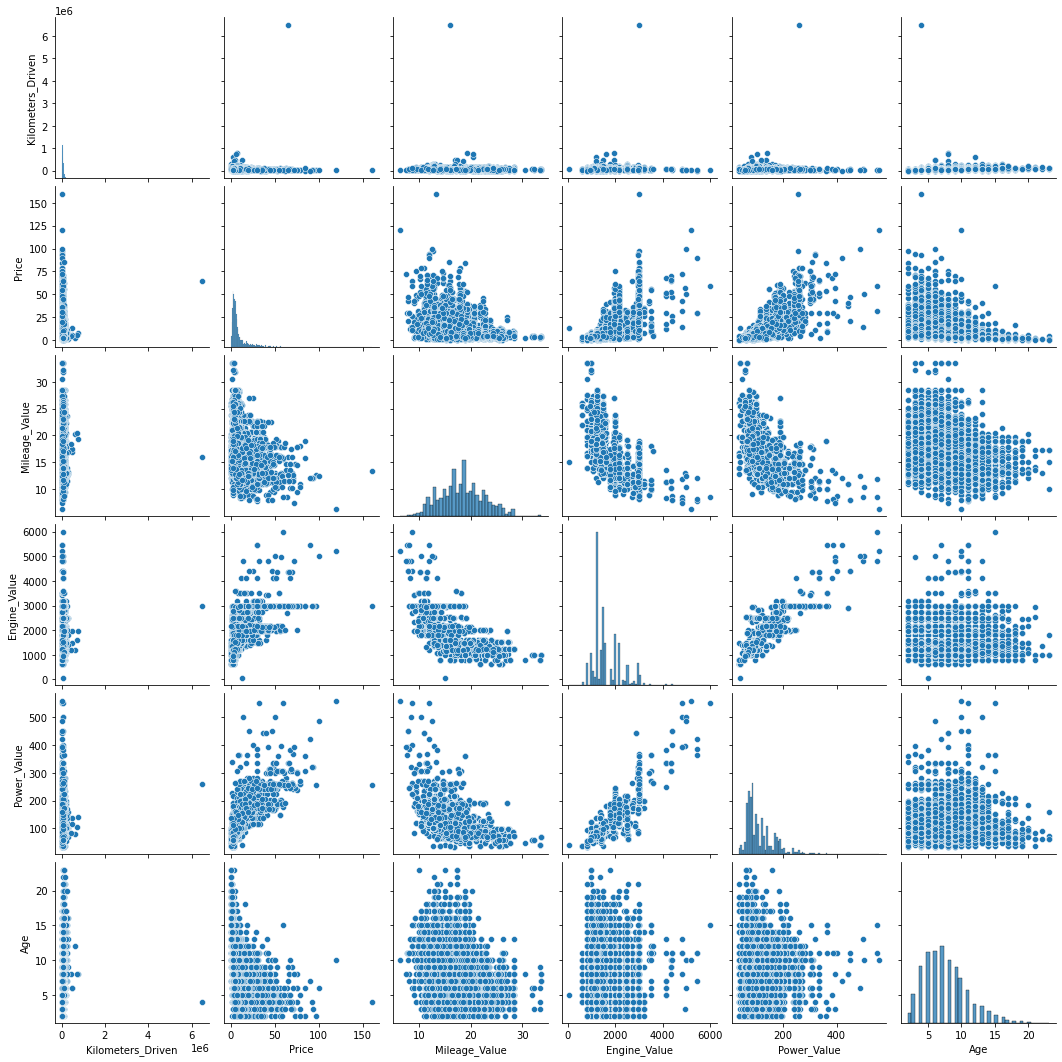

In [1864]:
sns.pairplot(data)

# 6. Model Building

### Define independent and dependent variable

In [1865]:
ind_vars = data.drop(['Price'],axis=1)
dep_var = data[['Price']]

### Create dummy variables

In [1866]:
# Function to create dummy variable

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [1867]:
ind_vars_num = encode_cat_vars(ind_vars)

In [1868]:
ind_vars_num.head()

,Kilometers_Driven,Mileage_Value,Engine_Value,Power_Value,Age,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Seats_is_missing,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,72000,26.6000,998.0000,58.1600,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,41000,19.6700,1582.0000,126.2000,6,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,46000,18.2000,1199.0000,88.7000,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,87000,20.7700,1248.0000,88.7600,9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,40670,15.2000,1968.0000,140.8000,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1869]:
ind_vars_num.shape

(6019, 61)

### Split dataset into training and test

In [1870]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [1871]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


### Fit a linear regression model

In [1872]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

### Check the coefficients and intercept of the model

In [1873]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Kilometers_Driven,-0.0000
Mileage_Value,-0.1186
Engine_Value,0.0010
Power_Value,0.0824
Age,-0.9054
Location_Bangalore,2.3202
Location_Chennai,1.2613
Location_Coimbatore,2.0306
Location_Delhi,-0.4702
Location_Hyderabad,1.9095


# 7. Model performance evaluation

In [1874]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [1875]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

    RMSE    MAE    R^2  Adjusted R^2
0 5.4174 2.9143 0.7705        0.7671


Test Performance

    RMSE    MAE    R^2  Adjusted R^2
0 5.9931 2.7961 0.6975        0.6870


#### Observations

- The train and test  𝑅2  are 0.77 and 0.70, indicating that the model explains 77% and 70% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict Price within a mean error of 0.30 on the test set.

# 8. Conclusions

- We have been able to build a predictive model that can be used to predict the price of used cars with an $R^2$ of 0.77 on the training set.


- Dealers can use this model to predict the price within a mean error of 0.30 on the test set.


- We found that the distributions are generally right skewed. But when log transformed, they tend to fit a lognormal distribution.


- Outlier analsyis showed that most data is within the acceptable -3 and 3 on a Z-square score


- Price appears to be correlated with Power and Engine values and less on the Mileage values. This may show that customers looking for older cars are not buying them for fuel efficiency.


- Price is also negatively correlated with age of the car as expected


- Other than a few select brands (Make) like Lamborghini, Mercedes, Jaguar, BMW and Porche, the brand of the car does not offer any advantage with respect to price


- Also observed is that Price tends to be lower in the 3 top cities - Kolkata, Mumbai and Dehi



# 9. Recommendations

- Price appears to be correlated with Power and Engine values and less on the Mileage values. This may show that customers looking for older cars are not buying them for fuel efficiency.


- Price is also negatively correlated with age of the car as expected


- Other than a few select brands (Make) like Lamborghini, Mercedes, Jaguar, BMW and Porche, the brand of the car does not offer any advantage with respect to price


- Also observed is that Price tends to be lower in the 3 top cities - Kolkata, Mumbai and Dehi

- Kilometers driven does not appear to inluence the Price much